In [51]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [52]:
path = 'C:/Users/user/Downloads/HRAnalytics'
train = pd.read_csv(path + '/train.csv')
test = pd.read_csv(path + '/test.csv')

In [53]:
train.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score,is_promoted
0,65438,Sales & Marketing,region_7,Master's & above,f,sourcing,1,35,5.0,8,1,0,49,0
1,65141,Operations,region_22,Bachelor's,m,other,1,30,5.0,4,0,0,60,0


In [54]:
train.isnull().sum()

employee_id                0
department                 0
region                     0
education               2409
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    4124
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
is_promoted                0
dtype: int64

In [55]:
train["education"].value_counts()

Bachelor's          36669
Master's & above    14925
Below Secondary       805
Name: education, dtype: int64

In [56]:
train.education.fillna("Bachelor's",inplace=True)

In [57]:
train.previous_year_rating.mean()

3.329255780917055

In [58]:
train.previous_year_rating.fillna(3,inplace=True)

In [59]:
test.head(2)

,employee_id,department,region,education,gender,recruitment_channel,no_of_trainings,age,previous_year_rating,length_of_service,KPIs_met >80%,awards_won?,avg_training_score
0,8724,Technology,region_26,Bachelor's,m,sourcing,1,24,NaN,1,1,0,77
1,74430,HR,region_4,Bachelor's,f,other,1,31,3.0,5,0,0,51


In [60]:
test.isnull().sum()

employee_id                0
department                 0
region                     0
education               1034
gender                     0
recruitment_channel        0
no_of_trainings            0
age                        0
previous_year_rating    1812
length_of_service          0
KPIs_met >80%              0
awards_won?                0
avg_training_score         0
dtype: int64

In [61]:
test["education"].value_counts()

Bachelor's          15578
Master's & above     6504
Below Secondary       374
Name: education, dtype: int64

In [62]:
test.education.fillna("Bachelor's",inplace=True)

In [63]:
test.previous_year_rating.mean()

3.339145677645539

In [64]:
test.previous_year_rating.fillna(3,inplace=True)

In [65]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54808 entries, 0 to 54807
Data columns (total 14 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   employee_id           54808 non-null  int64  
 1   department            54808 non-null  object 
 2   region                54808 non-null  object 
 3   education             54808 non-null  object 
 4   gender                54808 non-null  object 
 5   recruitment_channel   54808 non-null  object 
 6   no_of_trainings       54808 non-null  int64  
 7   age                   54808 non-null  int64  
 8   previous_year_rating  54808 non-null  float64
 9   length_of_service     54808 non-null  int64  
 10  KPIs_met >80%         54808 non-null  int64  
 11  awards_won?           54808 non-null  int64  
 12  avg_training_score    54808 non-null  int64  
 13  is_promoted           54808 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.9+ MB


In [66]:
train.columns

Index(['employee_id', 'department', 'region', 'education', 'gender',
       'recruitment_channel', 'no_of_trainings', 'age', 'previous_year_rating',
       'length_of_service', 'KPIs_met >80%', 'awards_won?',
       'avg_training_score', 'is_promoted'],
      dtype='object')

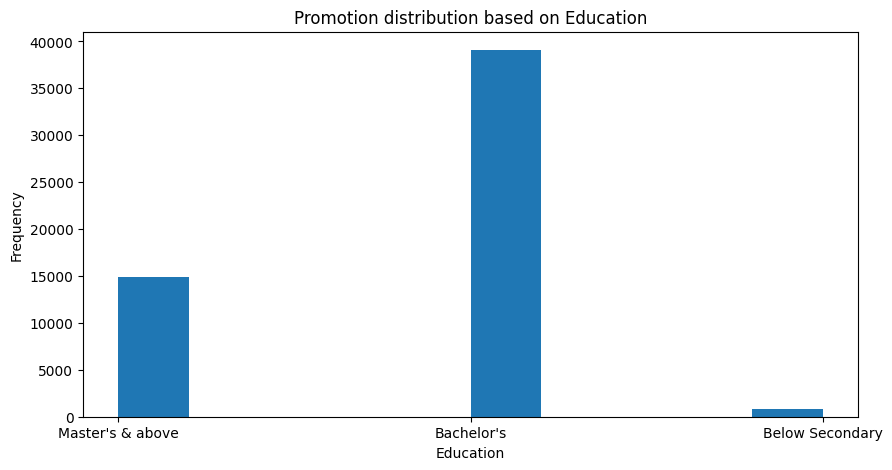

In [67]:
plt.figure(figsize=(10,5))
plt.hist(train['education'])
plt.xlabel('Education')
plt.ylabel('Frequency')
plt.title('Promotion distribution based on Education')
plt.show()

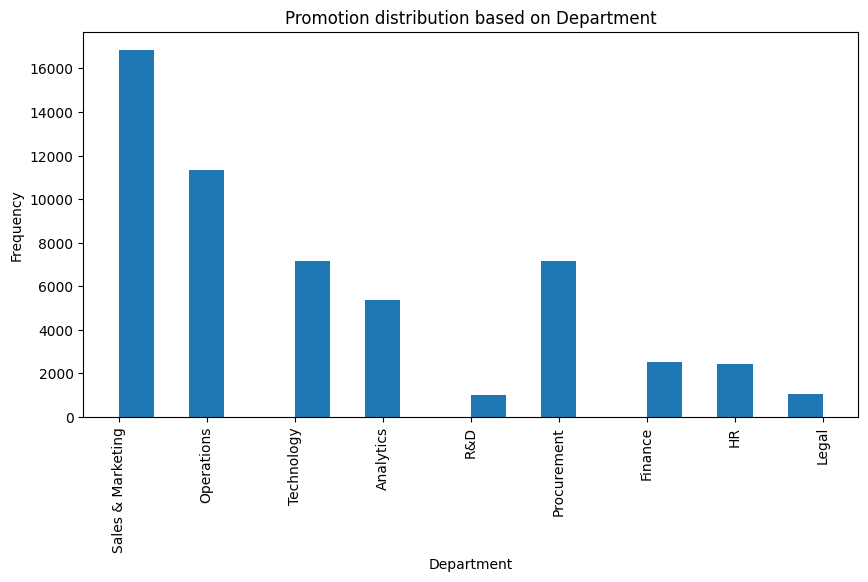

In [68]:
plt.figure(figsize=(10,5))
plt.hist(train['department'],bins=20)
plt.xlabel('Department')
plt.ylabel('Frequency')
plt.title('Promotion distribution based on Department')
plt.xticks(rotation=90)
plt.show()

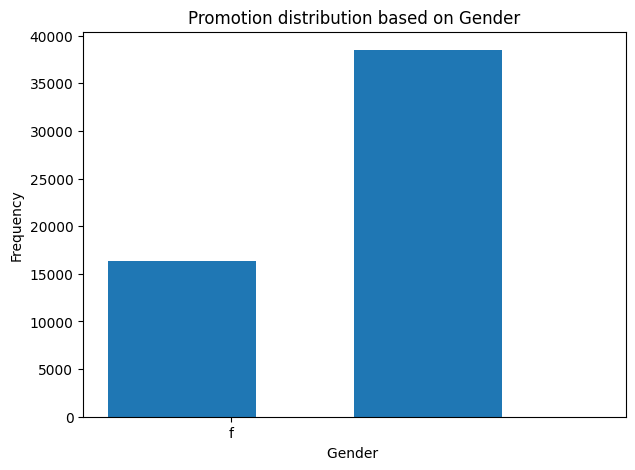

In [69]:
plt.figure(figsize=(7,5))
plt.hist(train['gender'],bins=len(train['gender'].unique()), align='left', width=0.3)
plt.xlabel('Gender ')
plt.ylabel('Frequency')
plt.title('Promotion distribution based on Gender')
plt.show()

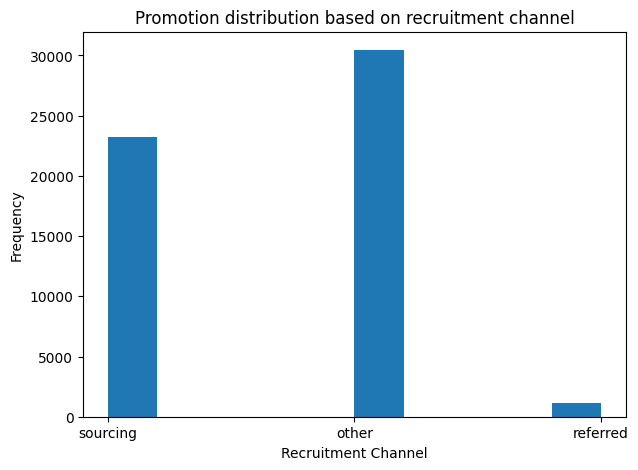

In [70]:
plt.figure(figsize=(7,5))
plt.hist(train['recruitment_channel'])
plt.xlabel('Recruitment Channel')
plt.ylabel('Frequency')
plt.title('Promotion distribution based on recruitment channel')
plt.show()

In [71]:
X = train.drop(['is_promoted'],axis=1)
y =train['is_promoted']

In [72]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
def processing_data(data):

    categ = ['department', 
             'region', 
             'education', 
             'gender',
            'recruitment_channel'] 

    processed_data = data.copy()

    if 'employee_id' in processed_data:
        processed_data = processed_data.drop(['employee_id'],axis=1)

    le = LabelEncoder()

    for col in categ:
        processed_data[col] = le.fit_transform(processed_data[col])

    return pd.DataFrame(processed_data, columns=processed_data.columns)                

In [74]:
processed_X = processing_data(X)

In [75]:
processed_test = processing_data(test)

In [76]:
processed_test.shape

(23490, 12)

In [77]:
processed_X.shape

(54808, 12)

In [78]:
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import SelectKBest,f_classif 

In [79]:
X_train,X_test,y_train,y_test = train_test_split(processed_X,y,
                                                 test_size=0.3,random_state=42)

In [80]:
k = 12

In [81]:
selector = SelectKBest(score_func=f_classif,k=k)
X_selected = selector.fit_transform(X_train,y_train)
X_test_selected = selector.transform(X_test)
processed_test = selector.transform(processed_test)

In [82]:
from sklearn.tree import DecisionTreeClassifier

In [83]:
dt = DecisionTreeClassifier()

In [84]:
dt = DecisionTreeClassifier(criterion='entropy',max_depth=10,max_features='sqrt',min_samples_leaf=2,min_samples_split=10)

In [85]:
dt.fit(X_selected,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=10, max_features='sqrt',
                       min_samples_leaf=2, min_samples_split=10)

In [86]:
y_pred = dt.predict(X_test_selected)

In [87]:
from sklearn.metrics import f1_score

In [88]:
score = f1_score(y_test,y_pred)

In [89]:
print(score)

0.2830655129789864


In [90]:
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV

In [91]:

xg = XGBClassifier()

In [92]:
'''
from sklearn.model_selection import GridSearchCV

param_grid = {'n_estimators':[50,100,150],
              'learning_rate':[0.1,0.3,0.5],
              'max_depth':[3,5,10],
              'subsample':[0.1,0.5],
              'gamma':[0.1,0.5,0.3],
              'eval_metric':['logloss','f1']}

xg = XGBClassifier()

grid_search = GridSearchCV(estimator=xg,param_grid=param_grid,verbose=1,n_jobs=-1)

grid_search.fit(X_selected,y_train)

best_params_ = grid_search.best_params_ 
print(best_params_) 
'''           

"\nfrom sklearn.model_selection import GridSearchCV\n\nparam_grid = {'n_estimators':[50,100,150],\n              'learning_rate':[0.1,0.3,0.5],\n              'max_depth':[3,5,10],\n              'subsample':[0.1,0.5],\n              'gamma':[0.1,0.5,0.3],\n              'eval_metric':['logloss','f1']}\n\nxg = XGBClassifier()\n\ngrid_search = GridSearchCV(estimator=xg,param_grid=param_grid,verbose=1,n_jobs=-1)\n\ngrid_search.fit(X_selected,y_train)\n\nbest_params_ = grid_search.best_params_ \nprint(best_params_) \n"

In [93]:
xg = XGBClassifier(n_estimators=150,learning_rate=0.1,max_depth=5,subsample=0.5,
                  eval_metric='logloss',random_state=42)

In [94]:
xg.fit(X_selected,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric='logloss',
              feature_types=None, gamma=None, gpu_id=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, n_estimators=150, n_jobs=None,
              num_parallel_tree=None, predictor=None, random_state=42, ...)

In [95]:
y_pred = xg.predict(X_test_selected)

In [96]:
score = f1_score(y_test,y_pred)

In [97]:
print(score)

0.5016538037486219


In [98]:
from lightgbm import LGBMClassifier

In [101]:
lc = LGBMClassifier(criterion='entropy',max_depth=10,max_features='None',min_samples_leaf=2,min_samples_split=10)

In [102]:
lc.fit(X_selected,y_train)

LGBMClassifier(criterion='entropy', max_depth=10, max_features='None',
               min_samples_leaf=2, min_samples_split=10)

In [103]:
y_pred = lc.predict(X_test_selected)

In [104]:
score = f1_score(y_test,y_pred)

In [105]:
test_pred = lc.predict(processed_test) 

In [106]:
print(score)

0.509825327510917


In [107]:
from sklearn.ensemble import RandomForestClassifier

In [116]:
hr_submission = pd.DataFrame({'employee_id':test['employee_id'],
                             'is_promoted':test_pred})

In [118]:
hr_submission.to_csv('hr_submission.csv',index=False)